### Analysis of transcription factor binding sites curated by JASPAR

This analysis aims to analysis the distribution of the transcription factor binding sites in human genome.

We will download the CORE files, including TFFM_table.csv and BED files.

<img src="../screenshots/Screenshot-jaspar_tffm.png" />

<img src="../screenshots/Screenshot-jaspar_bed.png" />

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

Let's read the BED files and concatenate them as a dataframe. We will select the transcription factors annotated in human genome hg38 only.

In [5]:
jaspar = []
for i in glob('../ref/jaspar/bed/*.bed'):
    try:
        j = pd.read_csv(i, sep='\t', header=None)
        j['matrix_base_id'] = os.path.basename(i).split('.')[0]
        jaspar.append(j)
    except:
        print(j)

MA1198


In [3]:
#concat all jaspar bed files
jaspar = pd.concat(jaspar)

#only include row with col. 4 containing hg38_
jaspar = jaspar[jaspar[3].str.contains('hg38_')].copy()

The TFFM table gives us useful information about each TFFM.

In [9]:
TFFM_table = pd.read_csv('../ref/jaspar/TFFM_table.csv')
TFFM_table.columns

Index(['id', 'base_id', 'version', 'matrix_base_id', 'matrix_version', 'name',
       'log_p_1st_order', 'log_p_detailed', 'experiment_name'],
      dtype='object')

However, the TFFM table has data for other species. We will retrieve human transcription factors from JASPER by hand and save it as jaspar_9606.txt.

In [10]:
hs = pd.read_csv('../ref/jaspar/jaspar_9606.txt', sep='\t', header=None)

In [11]:
hs

,0,1
0,MA0002.1,RUNX1
1,MA0003.1,TFAP2A
2,MA0003.2,TFAP2A
3,MA0003.3,TFAP2A
4,MA0003.4,TFAP2A
...,...,...
944,MA1984.1,ZNF667
945,MA1985.1,ZNF669
946,MA1986.1,ZNF692
947,MA1987.1,ZNF701


We will merge the dataframes to get humna only data.

In [13]:
ju = pd.merge(jaspar, TFFM_table)

In [14]:
ju

,0,1,2,3,4,5,matrix_base_id,id,base_id,version,matrix_version,name,log_p_1st_order,log_p_detailed,experiment_name
0,chr1,921181,921193,hg38_chr1:921182-921193(-),.,-,MA0465,57,TFFM0008,1,1,CDX2,-1826.50,-758.187,Cdx2_GSE14586_jl_AM_mm9_processed
1,chr1,921181,921193,hg38_chr1:921182-921193(-),.,-,MA0465,684,TFFM0008,2,2,CDX2,-4889.80,-3091.340,ReMap2020_CDX2
2,chr1,1014512,1014524,hg38_chr1:1014513-1014524(+),.,+,MA0465,57,TFFM0008,1,1,CDX2,-1826.50,-758.187,Cdx2_GSE14586_jl_AM_mm9_processed
3,chr1,1014512,1014524,hg38_chr1:1014513-1014524(+),.,+,MA0465,684,TFFM0008,2,2,CDX2,-4889.80,-3091.340,ReMap2020_CDX2
4,chr1,1109937,1109949,hg38_chr1:1109938-1109949(-),.,-,MA0465,57,TFFM0008,1,1,CDX2,-1826.50,-758.187,Cdx2_GSE14586_jl_AM_mm9_processed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15519725,chr6,30616665,30616676,hg38_chr6:30616666-30616676(-),.,-,MA1522,558,TFFM0524,1,1,MAZ,-9313.32,-9409.790,ReMap2020_MAZ
15519726,chr5,76819623,76819634,hg38_chr5:76819624-76819634(+),.,+,MA1522,558,TFFM0524,1,1,MAZ,-9313.32,-9409.790,ReMap2020_MAZ
15519727,chr11,860008,860019,hg38_chr11:860009-860019(-),.,-,MA1522,558,TFFM0524,1,1,MAZ,-9313.32,-9409.790,ReMap2020_MAZ
15519728,chr7,149706654,149706665,hg38_chr7:149706655-149706665(+),.,+,MA1522,558,TFFM0524,1,1,MAZ,-9313.32,-9409.790,ReMap2020_MAZ


We will drop duplicates in the merged dataframe.

In [6]:
ju = pd.merge(jaspar, TFFM_table).drop_duplicates([3,'name'])
hs['matrix_base_id'] = hs[0].str.split('.').apply(lambda x: x[0])
hs.columns = ['matrix_base_id_ver','name','matrix_base_id']
# We will export the merged dataframe as a custom BED file.
ju.to_csv('../ref/jaspar/jaspar2022_unique.bed', sep='\t', header=None, index=None)
ju = pd.merge(ju, hs).drop_duplicates([3,'name'])
jaspar.shape, ju.shape

((8985123, 7), (7585264, 16))

In [29]:
ju

,0,1,2,3,4,5,matrix_base_id,id,base_id,version,matrix_version,name,log_p_1st_order,log_p_detailed,experiment_name
0,chr1,921181,921193,hg38_chr1:921182-921193(-),.,-,MA0465,57,TFFM0008,1,1,CDX2,-1826.50,-758.187,Cdx2_GSE14586_jl_AM_mm9_processed
2,chr1,1014512,1014524,hg38_chr1:1014513-1014524(+),.,+,MA0465,57,TFFM0008,1,1,CDX2,-1826.50,-758.187,Cdx2_GSE14586_jl_AM_mm9_processed
4,chr1,1109937,1109949,hg38_chr1:1109938-1109949(-),.,-,MA0465,57,TFFM0008,1,1,CDX2,-1826.50,-758.187,Cdx2_GSE14586_jl_AM_mm9_processed
6,chr1,1110356,1110368,hg38_chr1:1110357-1110368(+),.,+,MA0465,57,TFFM0008,1,1,CDX2,-1826.50,-758.187,Cdx2_GSE14586_jl_AM_mm9_processed
8,chr1,1127261,1127273,hg38_chr1:1127262-1127273(-),.,-,MA0465,57,TFFM0008,1,1,CDX2,-1826.50,-758.187,Cdx2_GSE14586_jl_AM_mm9_processed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15519725,chr6,30616665,30616676,hg38_chr6:30616666-30616676(-),.,-,MA1522,558,TFFM0524,1,1,MAZ,-9313.32,-9409.790,ReMap2020_MAZ
15519726,chr5,76819623,76819634,hg38_chr5:76819624-76819634(+),.,+,MA1522,558,TFFM0524,1,1,MAZ,-9313.32,-9409.790,ReMap2020_MAZ
15519727,chr11,860008,860019,hg38_chr11:860009-860019(-),.,-,MA1522,558,TFFM0524,1,1,MAZ,-9313.32,-9409.790,ReMap2020_MAZ
15519728,chr7,149706654,149706665,hg38_chr7:149706655-149706665(+),.,+,MA1522,558,TFFM0524,1,1,MAZ,-9313.32,-9409.790,ReMap2020_MAZ


We can roughly estimate the percent transcription factor binding sites in the human genome. Here is the [size of human genome](https://mk.bcgsc.ca/telomere-to-telomere-human-genome-assembly/).

In [7]:
(ju[2] - ju[1]).sum() / 3117275501 *100

3.2462558079174406

We will run bedtools merge using -o distinct argument to group the overlapping transcription binding sites into lists.

We will read the processed BED file back using pandas.

In [40]:
jd = pd.read_csv('../ref/jaspar/jaspar2022_unique_sorted_distinct.bed', sep='\t', header=None)
jd['TFs'] = jd[5].str.split(',')
jd['Num TFs'] = jd.TFs.apply(len)

In [41]:
jd

,0,1,2,3,4,5,6,TFs,Num TFs
0,chr1,126159,126171,-,hg38_chr1:126160-126171(-),FOXA1,wgEncodeAwgTfbsHaibHepg2Foxa1sc6553V0416101Uni...,[FOXA1],1
1,chr1,126161,126173,+,hg38_chr1:126162-126173(+),FOXA1,wgEncodeAwgTfbsHaibHepg2Foxa1sc6553V0416101Uni...,[FOXA1],1
2,chr1,136714,136728,-,hg38_chr1:136715-136728(-),EGR1,wgEncodeAwgTfbsHaibK562Egr1V0416101UniPk.narro...,[EGR1],1
3,chr1,136762,136776,-,hg38_chr1:136763-136776(-),EGR1,wgEncodeAwgTfbsHaibK562Egr1V0416101UniPk.narro...,[EGR1],1
4,chr1,181415,181429,-,hg38_chr1:181416-181429(-),TFAP2C,REMAP_2020_Mmusculus,[TFAP2C],1
...,...,...,...,...,...,...,...,...,...
5350873,chrY,56851673,56851684,+,hg38_chrY:56851674-56851684(+),FOXA2,ReMap2020_FOXA2,[FOXA2],1
5350874,chrY,56868760,56868775,+,hg38_chrY:56868761-56868775(+),MAFK,wgEncodeAwgTfbsSydhHepg2Mafkab50322IggrabUniPk...,[MAFK],1
5350875,chrY,56873745,56873757,+,hg38_chrY:56873746-56873757(+),FOXA1,wgEncodeAwgTfbsHaibHepg2Foxa1sc6553V0416101Uni...,[FOXA1],1
5350876,chrY,56878594,56878618,+,hg38_chrY:56878595-56878618(+),ZNF382,CistromeDB_65138,[ZNF382],1


In [113]:
sns.color_palette().as_hex()[-4]

'#e377c2'

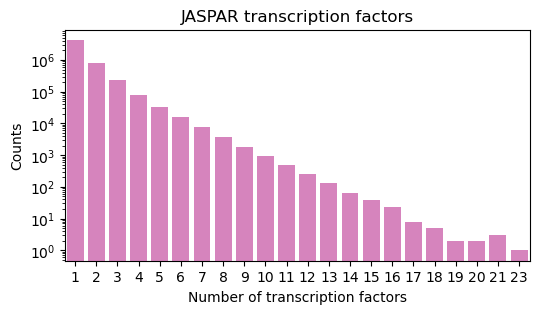

In [116]:
plt.figure(figsize=(6,3))
sns.countplot(data=jd, x=jd.TFs.apply(len), color='#e377c2')
plt.title('JASPAR transcription factors')
plt.yscale('log')
plt.xlabel('Number of transcription factors')
plt.ylabel('Counts')
plt.show()
#plt.savefig('Jaspar_TFs_distribution.pdf')

In [97]:
jd

,0,1,2,3,4,5,6,TFs,Num TFs
0,chr1,126159,126171,-,hg38_chr1:126160-126171(-),FOXA1,wgEncodeAwgTfbsHaibHepg2Foxa1sc6553V0416101Uni...,[FOXA1],1
1,chr1,126161,126173,+,hg38_chr1:126162-126173(+),FOXA1,wgEncodeAwgTfbsHaibHepg2Foxa1sc6553V0416101Uni...,[FOXA1],1
2,chr1,136714,136728,-,hg38_chr1:136715-136728(-),EGR1,wgEncodeAwgTfbsHaibK562Egr1V0416101UniPk.narro...,[EGR1],1
3,chr1,136762,136776,-,hg38_chr1:136763-136776(-),EGR1,wgEncodeAwgTfbsHaibK562Egr1V0416101UniPk.narro...,[EGR1],1
4,chr1,181415,181429,-,hg38_chr1:181416-181429(-),TFAP2C,REMAP_2020_Mmusculus,[TFAP2C],1
...,...,...,...,...,...,...,...,...,...
5350873,chrY,56851673,56851684,+,hg38_chrY:56851674-56851684(+),FOXA2,ReMap2020_FOXA2,[FOXA2],1
5350874,chrY,56868760,56868775,+,hg38_chrY:56868761-56868775(+),MAFK,wgEncodeAwgTfbsSydhHepg2Mafkab50322IggrabUniPk...,[MAFK],1
5350875,chrY,56873745,56873757,+,hg38_chrY:56873746-56873757(+),FOXA1,wgEncodeAwgTfbsHaibHepg2Foxa1sc6553V0416101Uni...,[FOXA1],1
5350876,chrY,56878594,56878618,+,hg38_chrY:56878595-56878618(+),ZNF382,CistromeDB_65138,[ZNF382],1


In [98]:
jd.value_counts('Num TFs')

Num TFs
1     4196573
2      782024
3      229697
4       78184
5       33912
6       15522
7        7591
8        3601
9        1798
10        944
11        505
12        250
13        130
14         65
15         38
16         23
17          8
18          5
21          3
19          2
20          2
23          1
dtype: int64